<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте и изучите файл</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбейте данные на выборки</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуйте модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверьте модель на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендации тарифов для оператора мобильной связи «Мегалайн» 

*Оператор мобильной связи выяснил: многие клиенты пользуются архивными тарифами. Оператор хочет построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».*  

*В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Цель - построить модель для задачи классификации, которая выберет подходящий тариф.*  

**Описание данных**  
*Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:*

*`сalls` — количество звонков,  
`minutes` — суммарная длительность звонков в минутах,  
`messages` — количество sms-сообщений,  
`mb_used` — израсходованный интернет-трафик в Мб,  
`is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).*

## Откройте и изучите файл

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# импорт статистики
from scipy import stats as st

# импорт моделей
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from joblib import dump

# импорт меткрик
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error

# импорт разное
from IPython.display import display_html
from IPython.core.display import display, HTML

In [2]:
try:
    users_behavior = pd.read_csv('/datasets/users_behavior.csv',sep=',')
    pd.set_option('display.max_columns', None)
    pd.options.mode.chained_assignment = None
    warnings.filterwarnings('ignore')
except:
    users_behavior = pd.read_csv('users_behavior.csv',sep=',')
    pd.set_option('display.max_columns', None)
    pd.options.mode.chained_assignment = None
    warnings.filterwarnings('ignore')

In [3]:
def info_row(df):
    '''
        Input: df - таблица pd.DataFrame.
        Output: None.
        Description: Функция первичного знакомства с данными.

    '''
    
    display(df.head(10))
    print('Общая информация:')
    display(df.info())
    print('Общая статистика:')
    display(df.describe())
    print('Дубликаты:')
    display(df.duplicated().sum())
    print(f'{df.duplicated().sum()/len(df):.1%}')
    print()
    print('Пропуски:')
    for col in df.columns:
        pct_missing = np.mean(df[col].isna())
        print('{} - {}%'.format(col, round(pct_missing*100,2)))
    print()
    print('Уникальные значения столбцов:')
    for row in df.columns:
        print('Уникальные значения столбца', row)
        print(df[row].unique())
    print()
    print('Матрица диаграмм:')
    pd.plotting.scatter_matrix(df,figsize=(10,10))
    plt.suptitle("Матрица диаграмм зависимостей", size=20)
    plt.show()
    print('Heatmap корреляций:')
    plt.figure(figsize=(10, 10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG') 
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
    plt.show()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

Общая статистика:


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Дубликаты:


0

0.0%

Пропуски:
calls - 0.0%
minutes - 0.0%
messages - 0.0%
mb_used - 0.0%
is_ultra - 0.0%

Уникальные значения столбцов:
Уникальные значения столбца calls
[ 40.  85.  77. 106.  66.  58.  57.  15.   7.  90.  82.  45.  51.  56.
 108.   6.   2.  26.  79.  49.  93.  48.  11.  53.  81. 154.  37.  50.
  41.  10.  71.  65. 110. 120.  76.  64.  23.  34.  98.  35.   5.  70.
 124. 129.  67.   0.  13.  68.  91. 121. 114. 125.  80.  33. 138.  84.
  78.  69.  63.  72.  73.   1.  43. 118.  74.  83. 141. 117.  54. 101.
  29.   3. 107.  55.  47. 158.  87.  28.  59.  52.  44.  17. 111. 109.
  14.  92.  94.  46. 133.  75.  38.  60. 100.  31.  61.  89.  27. 196.
  24.  99.  62. 162. 116. 123.  18.  21.  12.  86.  32.  95.  39.  30.
  25.  36.  42. 113.   9. 183. 156. 127.  96.  16.   4. 102.  97.  20.
 104. 144.  19. 132. 131. 136.  88. 115. 176. 160. 164. 169.  22. 105.
 152. 177. 161. 112.   8. 126. 178. 103. 130. 198. 119. 137. 150. 122.
 146. 151. 157. 203. 143. 148. 128. 185. 167. 181. 184. 171. 15

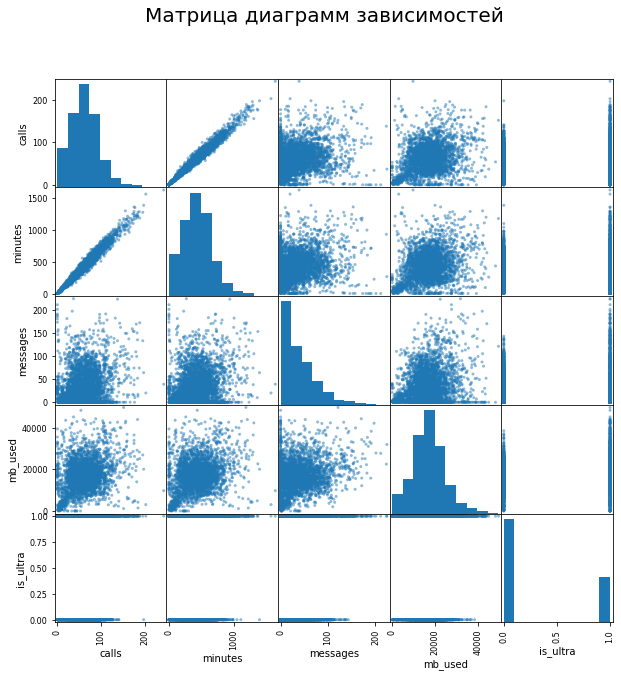

Heatmap корреляций:


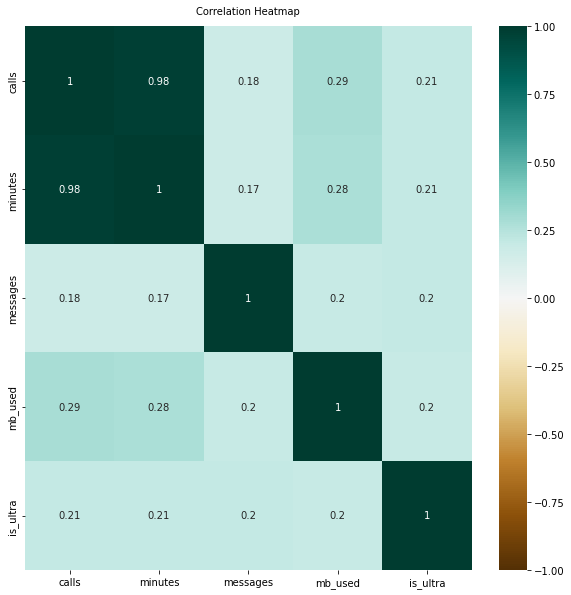

In [4]:
info_row(users_behavior)

### Вывод

*Данные состоят из 3214 наблюдений и 5 столбцов. Предобработка данных не понадобится, пропусков нет, а все данные в нужном формате. Можно приступать к разделению данных на выборки.*  
*Два признака  коллинеарны, когда они находятся между собой в линейной зависимости, если коэффициент корреляции более 0,7.  
    `Мультиколлинеарность` — корреляция независимых переменных, которая затрудняет оценку и анализ общего результата. Когда независимые переменные коррелируют друг с другом, говорят о возникновении мультиколлинеарности. Мультиколлинеарность может стать причиной переобучаемости модели, что приведет к неверному результату . Кроме того, избыточные коэффициенты увеличивают сложность модели машинного обучения, а значит, время ее тренировки возрастает. Две переменных коллинеарны, когда они находятся между собой в линейной зависимости, если коэффициент корреляции более 0,7."  
   Коэфициент корреляции Пирсона между признаками `calls` и `minutes` равен 0,98, что говорит о ярком проявлении линейной связи между ними.  
    Признаками `calls` и `minutes` -  мультиколлинеарны.  
    Чтобы избавиться от мультиколлинарности, необходимо исключить из модели один из факторов. Так как данные о количестве звонков(`calls`) не являются необходимым признаком для определения тарифа, то избавимся от данной колонки, чтобы избежать негативного воздействия этого явления на обучаемую модель*


## Разбейте данные на выборки

*Выведем признаки очистив их от лишних данных и присвоим `features` и целевой признак присвоим переменной `target`.*

In [5]:
features = users_behavior.drop(['calls','is_ultra'], axis=1)
target = users_behavior['is_ultra']

*Целевой признак и признаки извлечены, теперь необходимо разделить данные на валидационную, тестовую и тренировочную выборки.  
Так как спрятанной тестовой выборки нет. Значит, данные будем разбивать на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов делаем равными. Соответственно исходные данные разбиваем в соотношении 60%:20%:20%.*

In [6]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, train_size=0.60,random_state=12345)

display(HTML(f"<font color='orange'>Кортеж измерений массива target_train: {target_train.shape}</font>"))
display(HTML(f"<font color='blue'>Кортеж измерений массива target_test: {target_test.shape}</font>"))
display(HTML(f"<font color='orange'>Кортеж измерений массива features_train: {features_train.shape}</font>"))
display(HTML(f"<font color='blue'>Кортеж измерений массива features_test: {features_test.shape}</font>"))

# Отделяем  40% данных для временной тестовой выборки

In [7]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, train_size=0.50,random_state=12345)

display(HTML(f"<font color='orange'>Кортеж измерений массива target_test: {target_test.shape}</font>"))
display(HTML(f"<font color='blue'>Кортеж измерений массива target_valid: {target_valid.shape}</font>"))
display(HTML(f"<font color='orange'>Кортеж измерений массива features_test: {features_test.shape}</font>"))
display(HTML(f"<font color='blue'>Кортеж измерений массива features_valid: {features_valid.shape}</font>"))
# Делим временную тестовую выборку на тестовую и валидационную поровну 

### Вывод

*Данные разделены на три выборки:  
Обучающая: `features_train` - признаки, `target_train` - целевой признак  
Валидационная: `features_valid` - признаки, `target_valid` - целевой признак    
Тренировочная: `features_test` - признаки, `target_test` - целевой признак    
В соотношении 60%/20%/20%*

## Исследуйте модели

*Исследуем качество моделей* ***`Дерева решений`***.  

*В первом случае меняем значения `min_samples_split` и `min_samples_leaf`, выставляя предельные значения и постепенно уменьшая их так, чтобы качество класификатора не терялось.*


In [8]:
%%time
best_model_split_leaf = None
best_result_tree = 0

for i,split in enumerate(range(2,3,1)):
    for j,leaf in enumerate(range(1,17,1)):
        model_tree = DecisionTreeClassifier(random_state=12345,min_samples_split=split,min_samples_leaf=leaf)
        model_tree.fit(features_train,target_train)
        result_tree = model_tree.score(features_valid,target_valid)
        
        if result_tree > best_result_tree:
            best_model_split_leaf = model_tree 
            best_result_tree = result_tree

display(HTML(f"<font color='blue'>Accuracy наилучшей модели на валидационной выборке: {best_result_tree}</font>"))  
display(HTML(f"<font color='blue'>Минимальное количество примеров для разделения: {split}</font>"))
display(HTML(f"<font color='blue'>Минимальное количество объектов в листе: {leaf}</font>"))

Wall time: 107 ms


*Удалось подобрать минимальные значения:  
`min_samples_split`(Минимальное количество примеров для разделения: 2);  
`min_samples_leaf`(Минимальное количество объектов в листе: 16)*

*В целях избежания возможного `переобучения модели`, пробуем уменьшать гиперпараметр `max_depth`, при выбранных минимальных значениях `min_samples_leaf` и `min_samples_split` и сохранении полученной точности модели.*

In [9]:
%%time
best_model_depth = None
best_result_tree = 0


for depth in range(1, 9,1):
    model_tree = DecisionTreeClassifier(random_state=12345,min_samples_leaf=16, min_samples_split=2, max_depth=depth)
    model_tree.fit(features_train,target_train)
    result_tree = model_tree.score(features_valid,target_valid)

    
    if result_tree > best_result_tree:
        best_model_depth = model_tree 
        best_result_tree = result_tree
        joblib.dump(best_model_depth, 'best_model_depth.joblib')
display(HTML(f"<font color='blue'>Accuracy наилучшей модели на валидационной выборке: {best_result_tree}</font>"))  
display(HTML(f"<font color='blue'>Максимально допустимая глубина дерева: {depth}</font>"))

# сохранили наилучшую модель 

Wall time: 44.9 ms


*Вручную меняя максимальный предел удалось получить минимальное значение `max_depth`(максимально допустимая глубина дерева), равное 9.*  

*Итоговая точность модели `Решающее дерево` с минимальными значениями гиперпараметров:  
`max_depth`=9,`min_samples_split`=2,`min_samples_leaf`=16  
<font color='blue'>Accuracy наилучшей модели на валидационной выборке: 0.807153965785381</font>*

*Исследуем качество моделей* ***`Случайный лес`***.  

Пробуем менять `min_samples_leaf` и `min_samples_split`.

In [10]:
%%time
best_model_forest = None
best_result_forest = 0

for i,split in enumerate(range(2,10)):
    for j,leaf in enumerate(range(1,4)):
        model_forest = RandomForestClassifier(random_state=12345, min_samples_split=split,min_samples_leaf=leaf) 
        model_forest.fit(features_train,target_train)

     
        result_forest = model_forest.score(features_valid,target_valid) 
        if result_forest > best_result_forest:
            best_model_forest = model_forest
            best_result_forest = result_forest
            
display(HTML(f"<font color='blue'>Accuracy наилучшей модели на валидационной выборке: {best_result_forest}</font>"))  
display(HTML(f"<font color='blue'>Минимальное количество примеров для разделения: {split}</font>"))
display(HTML(f"<font color='blue'>Минимальное количество объектов в листе: {leaf}</font>"))

Wall time: 5.29 s


*Удалось подобрать минимальные значения:  
`min_samples_split`(Минимальное количество примеров для разделения: 9);  
`min_samples_leaf`(Минимальное количество объектов в листе: 3)*

*Пробуем менять только лишь `n_estimators`(количество деревьев в лесу), при заданных значениях `min_samples_split`=9 и  
`min_samples_leaf`=3*

In [11]:
%%time
best_model_forest_est = None
best_result_forest_est = 0

for est in range(1, 101):
    model_forest = RandomForestClassifier(random_state=12345,min_samples_split=9, min_samples_leaf=3, n_estimators=est) 
    model_forest.fit(features_train,target_train)

    
    result_forest = model_forest.score(features_valid,target_valid) 
    if result_forest > best_result_forest_est:
        best_model_forest_est = model_forest
        best_result_forest_est = result_forest
        joblib.dump(best_model_forest_est, 'best_model_forest.joblib')
display(HTML(f"<font color='blue'>Accuracy наилучшей модели на валидационной выборке: {best_result_forest_est}</font>"))  
display(HTML(f"<font color='blue'>Количество деревьев наилучшей модели Случайный лес: {est}</font>"))

# сохранили наилучшую модель

Wall time: 10.8 s


*При заданных значениях гиперпараметров `min_samples_split`=9 и `min_samples_leaf`=3, с сохранением исходной точности, минимальное значение `n_estimators`:*  

<font color='blue'>*Количество деревьев наилучшей модели Случайный лес: 100* </font>.

*Исследуем качество моделей* ***`Логистической регрессии`***

In [12]:
%%time
model_log_reg = LogisticRegression(random_state=12345)
model_log_reg.fit(features_train,target_train) 
result_log_reg = model_log_reg.score(features_valid,target_valid) 

joblib.dump(model_log_reg, 'model_log_reg.joblib')

display(HTML(f"<font color='blue'>Accuracy модели логистической регрессии на валидационной выборке:\
{result_log_reg}</font>"))

# сохранили модель

Wall time: 18.9 ms


### Вывод

* *Самым быстрым и наименее точным оказался метод* ***`Логистической регрессии`***. *Accuracy = 0.6982892690513219. - Не проходит по заданной точности 0.75*   
* *Наиболее точным(из мной проверенных вариаций) и наиболее долгим является метод* ***`RandomForestClassifier(Случайный лес)`***.  

<font color='blue'>*Accuracy = 0.812.*</font> 
  
* *Наиболее оптимальным с точки зрения точность/время выполнения является метод* ***`DecisionTreeClassifier(Дерева решений)`***.  

<font color='blue'>*Accuracy = 0.807.*</font>   

## Проверьте модель на тестовой выборке

*Протестируем качество модели* ***`Дерева решений`*** *на тестовой выборке.  
Выбрали оптимальный вариант с гиперпараметрами:  
`max_depth`=9,`min_samples_split`=2,`min_samples_leaf`=16*

In [13]:
model_tree_test = DecisionTreeClassifier(random_state=12345,min_samples_leaf=16,min_samples_split=2,max_depth=9)
model_tree_test.fit(features_train,target_train)

test_predictions_tree = model_tree_test.predict(features_test)


display(HTML(f"<font color='blue'>Accuracy модели Дерева решений на тестовой выборке:\
{accuracy_score(test_predictions_tree,target_test)}</font>"))

*Протестируем качество модели* ***`Случайный лес`*** *на тестовой выборке.  
Выбрали оптимальный вариант с гиперпараметрами:  
`min_samples_split`=9 и `min_samples_leaf`=3,`n_estimators` = 100*

In [14]:
model_forest_test = RandomForestClassifier(random_state=12345,min_samples_split=9, n_estimators=100,min_samples_leaf=29) 
model_forest_test.fit(features_train,target_train)
test_predictions_forest = model_forest_test.predict(features_test)


display(HTML(f"<font color='blue'>Accuracy модели Случайный лес на тестовой выборке:\
{accuracy_score(test_predictions_forest,target_test)}</font>"))

### Вывод

*На тестовой выборке модели `DecisionTreeClassifier`(Дерево решений) и `RandomForestClassifier`(Случайный лес) показали практически одинаковую точность `0.78`.*  
*С учетом того, что модель `DecisionTreeClassifier`(Дерево решений) работает быстрее, целесообразнее выбрать ее в качестве алгоритма предсказания оптимальных тарифов, в случае большого набора данных.*

## (бонус) Проверьте модели на адекватность

*Вероятность ошибки случайной модели - 50%.  
Вероятность же ошибки выбранных моделей - 22%, что естественно ниже.  
Следует считать данные модели адекватными.*  

*Так же выбранную модель можно проверить на адекватность сравнив с моделью `DummyClassifier` библиотеки `Sklearn`.  
Этот классификатор служит простой базой для сравнения с другими более сложными классификаторами.  
Конкретное поведение базовой линии выбирается с помощью параметра `strategy`.  
Сравним с двумя вариантами данного классификатора, используя аргументы `strategy`:*  
- *`most_frequent`,который всегда предсказывает наиболее частую метку в обучающем наборе.*
- *`uniform`, генерирует прогнозы равномерно случайным образом из списка уникальных классов в обучающем наборе(фактически имитирует случайную модель).*

In [15]:

dummy_uniform = DummyClassifier(strategy='uniform', random_state=12345).fit(features_train, target_train)
dummy_pred = dummy_uniform.predict(features_test)


display(HTML(f"<font color='blue'>Уникальные значения:{np.unique(dummy_pred)}</font>"))
display(HTML(f"<font color='blue'>Тестовые значения значения accuracy:{accuracy_score(target_test, dummy_pred)}</font>"))

# Обучение модели с аргументом strategy = 'uniform'

*Как и предполагалось вероятность "случайного метода" - 50/50*

In [16]:
dummy_frequent = DummyClassifier(strategy="most_frequent", random_state=12345).fit(features_train, target_train)
dummy_pred_f = dummy_frequent.predict(features_test)


display(HTML(f"<font color='blue'>Уникальные значения:{np.unique(dummy_pred_f)}</font>"))
display(HTML(f"<font color='blue'>Тестовые значения значения accuracy:{accuracy_score(target_test, dummy_pred_f)}</font>"))
# Обучение модели с аргументом strategy = 'most_frequent'

*Данный метод выдал вероятность ошибки - 29%, что является ниже процента ошибки случайной модели, но выше обеих выбранных оптимальных моделей.*

## Общий вывод

*Оптимальные модели для задачи классификации, которая выберет подходящий тариф (`Смарт` или `Ультра`), соответствующий потребностям клиентов компании "Мегалайн", пользующихся архивными тарифами:  
Модель на алгоритме классификации `DecisionTreeClassifier`(Дерево решений) с гиперпараметрами:*   
`max_depth` = 9  
`min_samples_leaf` = 16  
`min_samples_split`=2

*Данная модель обладает точностью принятия решения - 0.78(согласно проверке на тестовой сборке), что выше порогового значения в 0.75. Предназначена для оценки больших массивов данных.*  

Модель на алгоритме классификации `RandomForestClassifier`(Дерево решений) с гиперпараметрами:   
`n_estimators` = 100  
`min_samples_leaf` = 3  
`min_samples_split`=9  
*Данная модель обладает точностью принятия решения - 0.78(согласно проверке на тестовой сборке), что выше порогового значения в 0.75. Предназначена для оценки меньших массивов данных, ввиду более долгого времени исполнения и большей нагрузки на систему.*